In [ ]:
# Installing packages
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

The subprocess package in Python is a general-purpose package for creating new processes, connecting to their input/output/error pipes, and obtaining their return codes.

The subprocess package itself does not specifically deal with video data processing. However, it can be used in conjunction with other libraries and tools that are designed for video data processing. For example, you can use subprocess to call command-line tools such as FFmpeg or OpenCV to perform video processing tasks such as video conversion, frame extraction, or object detection.

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
input_file = "/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi"
output_file = "/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.mp4"
subprocess.run(['ffmpeg','-i',input_file,'-qscale','0',output_file,'-loglevel','quiet'])

#converting the input video and storing the .mp4 file format as output file

CompletedProcess(args=['ffmpeg', '-i', '/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi', '-qscale', '0', '/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.mp4', '-loglevel', 'quiet'], returncode=0)

In [ ]:
!ls -GFlash --color

total 20K
4.0K drwxr-xr-x 1 root 4.0K Apr 13 00:05 ./
4.0K drwxr-xr-x 1 root 4.0K Apr 13 00:04 ../
4.0K drwxr-xr-x 4 root 4.0K Apr 11 13:32 .config/
4.0K drwx------ 6 root 4.0K Apr 13 00:05 drive/
4.0K drwxr-xr-x 1 root 4.0K Apr 11 13:33 sample_data/


## Open the Video and Read Metadata

In [ ]:
ipd.Video('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi', width=500)

In [ ]:
# Load in video capture
cap = cv2.VideoCapture('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi')


In [ ]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

975.0

In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'fps = {fps : 0.2f}')

fps =  39.00


In [ ]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 640.0, Width 1272.0


In [ ]:
cap.release()

The cap.release() method is used to release the video capture object and free up the associated system resources, such as the camera or the file handle.

It is recommended to release the video capture object using cap.release() when you are done using it, to avoid any potential memory leaks and to ensure that the system resources are freed up.

## Pulling in Images from Video

In [ ]:
#for single image

cap = cv2.VideoCapture('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.mp4')
ret, img = cap.read()
#read method returns result and imgage
print(f'Returned {ret} and img of shape {img.shape}')
#its a numpy array in 3d 

Returned True and img of shape (640, 1272, 3)


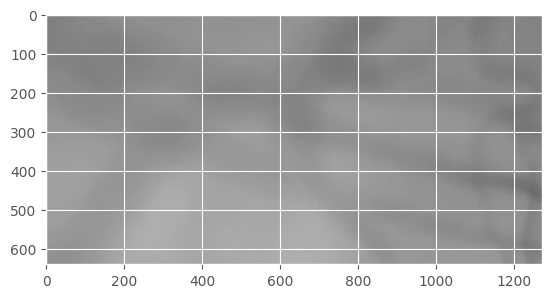

In [ ]:
plt.imshow(img)
#the draw back using plt for images is it gives grid form of images. hence will use cv2

In [ ]:

## Helper function for plotting opencv images in notebook.
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

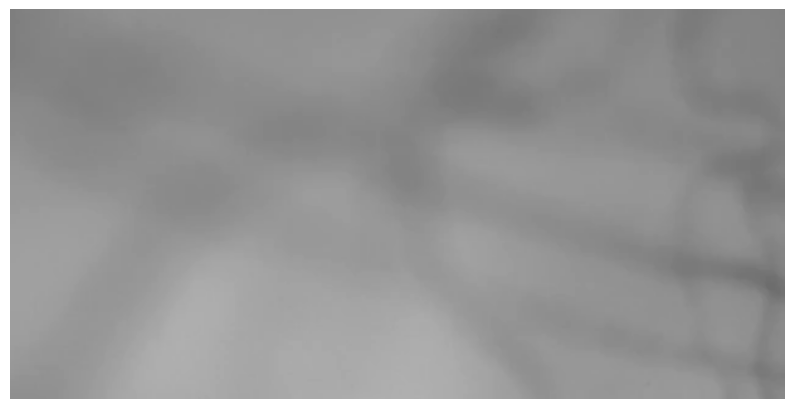

In [ ]:
display_cv2_img(img)

In [ ]:
cap.release()

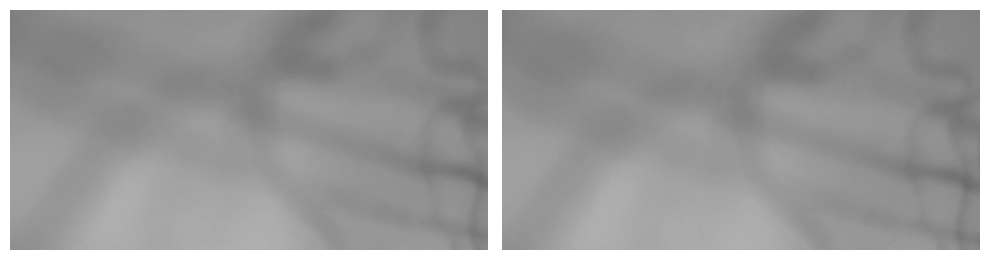

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.flatten()

cap = cv2.VideoCapture('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi')
for img_idx in range(2):
    ret, img = cap.read()
    if ret == False:
        break
    axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[img_idx].axis('off')

plt.tight_layout()
plt.show()
cap.release()


## lets pull all images/Frames from the video

In my intial code I have created a grid of 2 subplots using plt.subplots(5, 5). But to display all 975 frames, I need to create a grid of subplots that can accommodate that many frames. After little bit of internet surfing I got one way to do this id by calculating the number of rows and columns needed based on the aspect ratio of the frames and the desired size of the plot

<ipython-input-33-cd09b42f916a>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


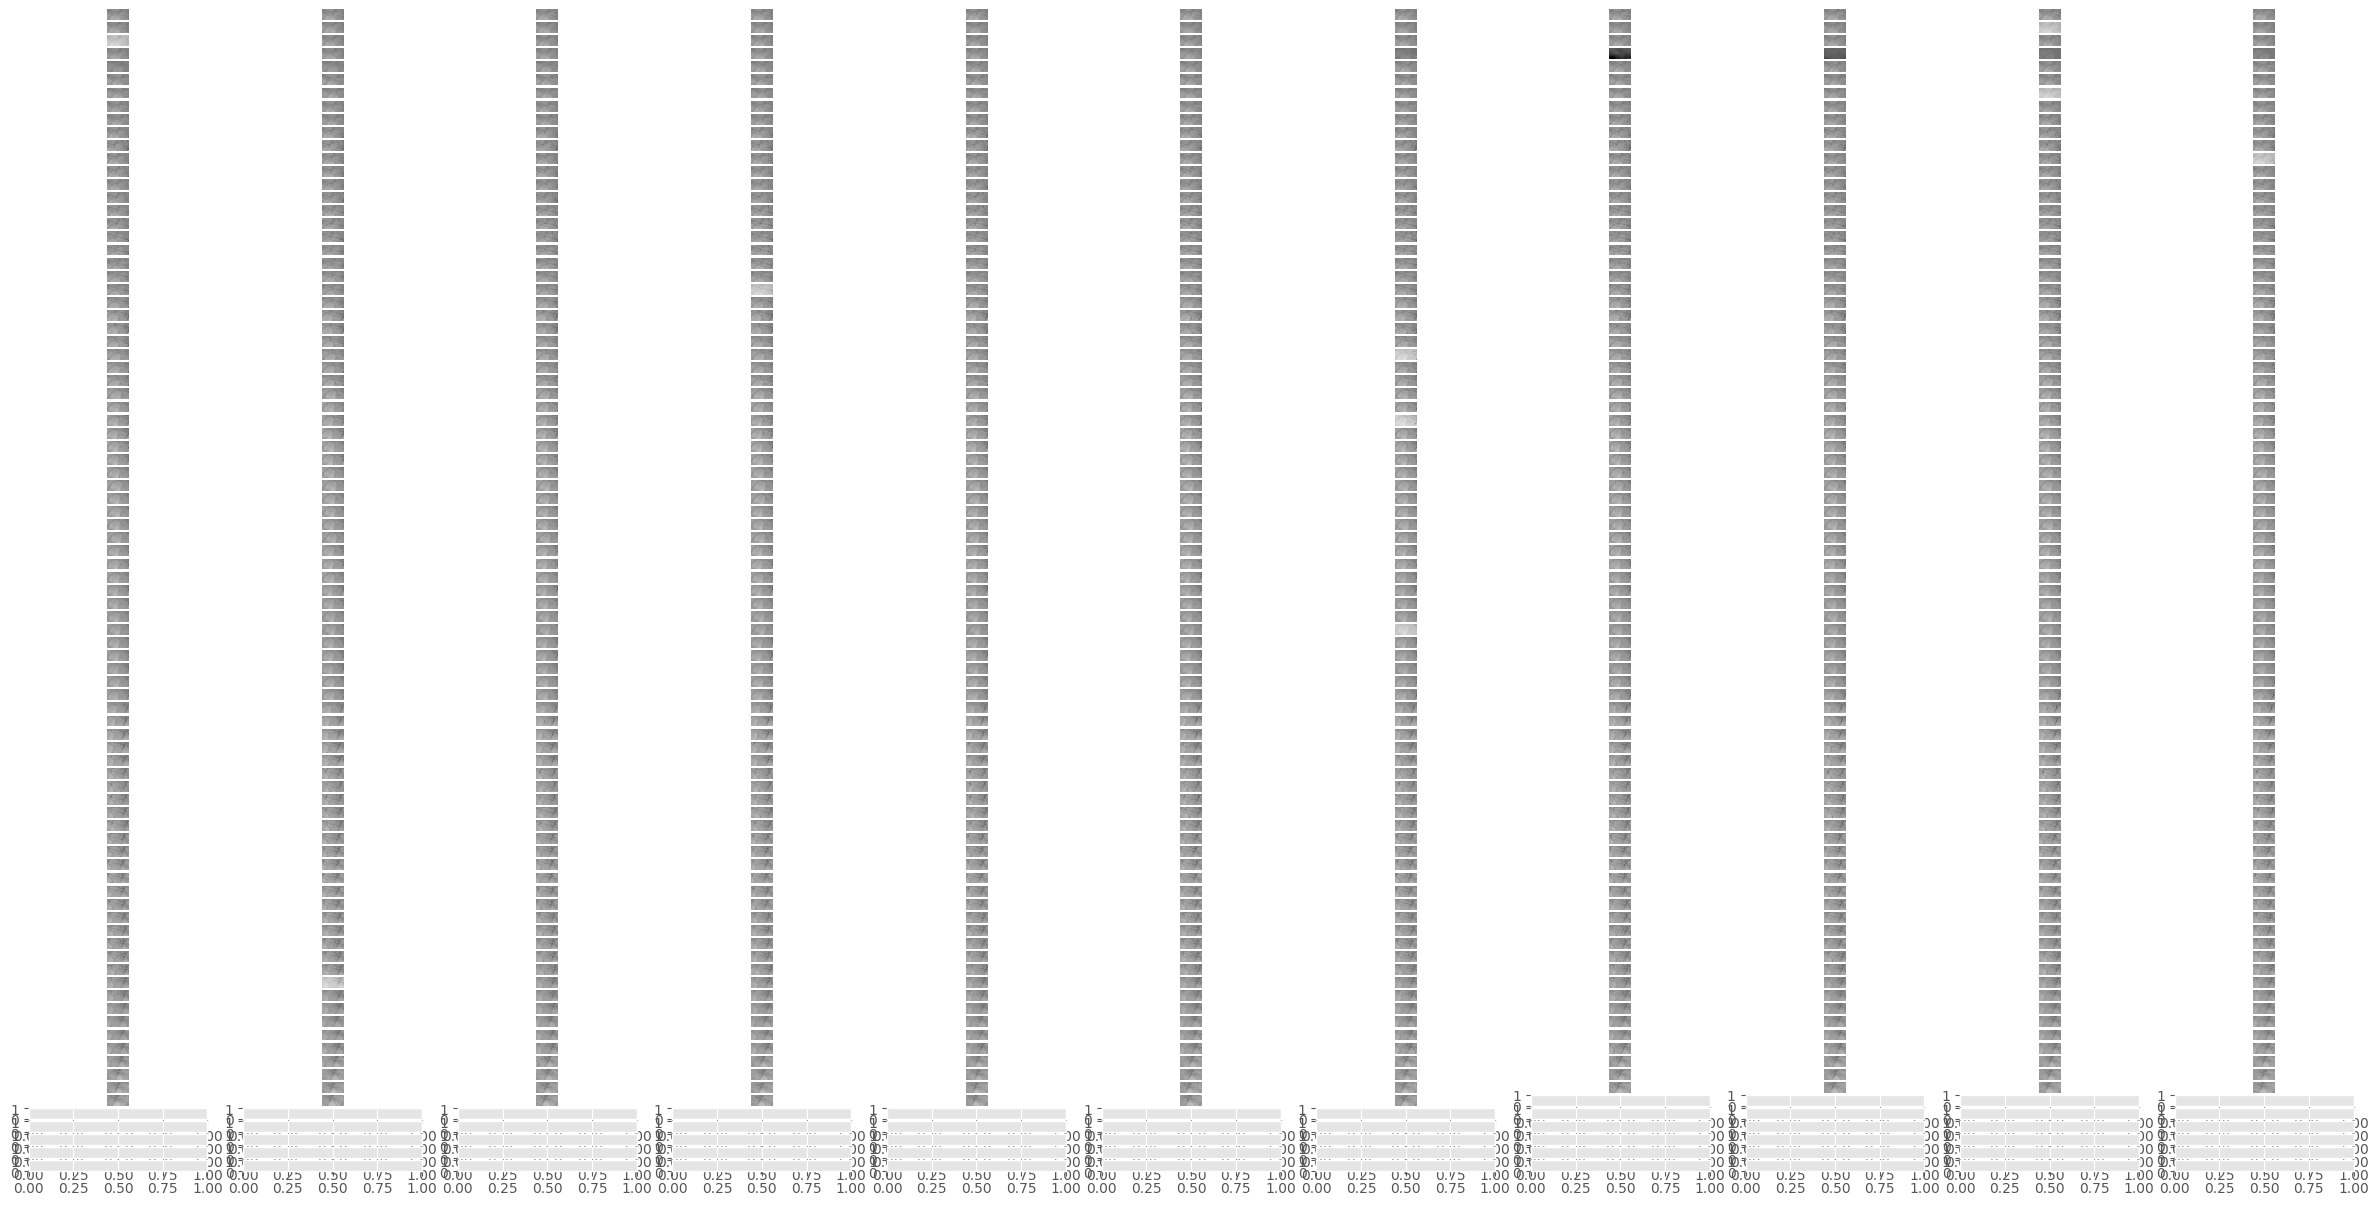

In [ ]:


cap = cv2.VideoCapture('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi')
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
aspect_ratio = cap.get(cv2.CAP_PROP_FRAME_WIDTH) / cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

# Calculate the number of rows and columns needed based on the aspect ratio and desired size of the plot
fig_width = 30
fig_height = fig_width / aspect_ratio
n_cols = int(np.sqrt(n_frames * aspect_ratio / fig_height) + 0.5)
n_rows = int(np.ceil(n_frames / n_cols))

# fig, axs = plt.subplots(5, 5, figsize=(30,20))
# fig.flatten()

fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()

for img_idx in range(n_frames):
    # print(img_idx)
    ret, img = cap.read()
    if ret == False:
        break
    axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[img_idx].axis('off')

plt.tight_layout()
plt.show()
cap.release()

## This results in 975 frames/images which becomes messy in notebook to process the data. hence lets store this in a folder.

In [39]:
#creating a folder to save the image output

if not os.path.exists("/content/drive/MyDrive/Research_Anomaly_detection/output"):
  os.makedirs('/content/drive/MyDrive/Research_Anomaly_detection/output')

cap = cv2.VideoCapture('/content/drive/MyDrive/Research_Anomaly_detection/Data/H.K. 10.21.21 Left Eye.avi')
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for img_idx in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    # Save each frame as a file in the 'output' folder
    filename = os.path.join('/content/drive/MyDrive/Research_Anomaly_detection/output', f'frame_{img_idx:04d}.jpg')
    # print(filename)
    cv2.imwrite(filename, img)

cap.release()


In [ ]:
## 

## Building model: unsupervised anomaly detection
After researching a bit trying approach of unsupervised anomaly detection using anomalib library.
Anomalib is developed by -Intel OpenVinoToolkit
